# Ouesso-Gruppe

* [Funde](#Funde)
    * [Befunde](#Befunde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
    * [Matrix mit allen Pos & Verz](#Matrix-mit-allen-Pos-&-Verz)
* [Verbreitung](#Verbreitung)
* [Appendix](#Appendix)
    * [Unterscheidung I / II](#Unterscheidung-I-/-II)
    * [Mutmaßliche PIKMUN Schalen am oberen Ubangi](#Mutmaßliche-PIKMUN-Schalen-am-oberen-Ubangi)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'OUE'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Formen

In [2]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,7,20.588235
GE,27,79.411765


In [4]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

df_pivot = df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], columns='Typ', aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl                                
Typ                                     OUE OUE (?) OUE/MDB (?) OUE/NGB (?)
ort_fluss Ort                 bef_nr                                       
Ngoko     Pandama (Fpl. 276)  87/101    5.0     5.0         NaN         NaN
                              87/102    1.0     NaN         NaN         NaN
Sangha    Bomasa (Fpl. 274)   87/101    NaN     1.0         NaN         NaN
          Bonda (Fpl. 272)    87/101    NaN     2.0         NaN         NaN
          Gbagbale (Fpl. 270) 87/101    NaN     1.0         NaN         NaN
          Matoto (Fpl. 264)   87/101    NaN     2.0         NaN         NaN
          Ouesso (Fpl. 265)   87/101    NaN     1.0         NaN         NaN
                              87/102    1.0     NaN         NaN         2.0
          Pikunda (Fpl. 255)  87/101    1.0     NaN         NaN         NaN
                              87/2      NaN     3.0         2.0         NaN

In [5]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == style]),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,19,70.37037
sicher,8,29.62963


In [6]:
# nur ausgezählte Stücke
df_a = df.loc[df['Anzahl'] != 1]

In [7]:
df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,W,All
Typ,,
OUE (?),7.0,7.0
All,7.0,7.0


In [8]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

,,,Anzahl
ort_fluss,Ort,bef_nr,
Sangha,Pikunda (Fpl. 255),87/2,7


### Befunde

In [9]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'bef_art', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
bef_art,,
Grube,12,35.294118
Oberfl,22,64.705882


Nur die Stücke aus den Gräbern:

In [10]:
df[df['bef_art'] == 'Grube']

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ
17,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,4837,W,2,None,OUE (?)
18,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,4838,W,1,None,OUE (?)
19,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,4878,W,2,None,OUE (?)
20,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,4887,W,3,None,OUE (?)
21,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,5099,W,1,None,OUE/MDB (?)
22,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,5100,W,1,None,OUE/MDB (?)
23,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,5101,W,1,None,OUE (?)
24,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,5105,W,1,None,OUE (?)


## Scherbentypen

In [11]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
# df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,NaN,NaN
R,6.0,17.647059
W,28.0,82.352941
B,NaN,NaN


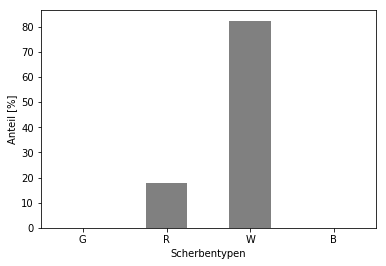

In [12]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [13]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [14]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


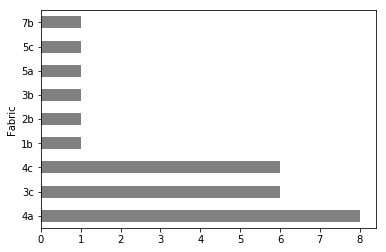

In [15]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [16]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
4a,8,30.769231
3c,6,23.076923
4c,6,23.076923
1b,1,3.846154
2b,1,3.846154


In [17]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,2,8.0
wenig,2,8.0
mittel,8,32.0
viel,11,44.0
sehr viel,2,8.0


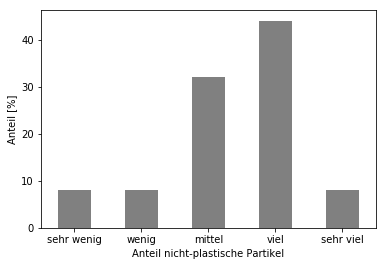

In [18]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [19]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,2.0,8.0
F,NaN,NaN
M,11.0,44.0
C,9.0,36.0
VC,3.0,12.0


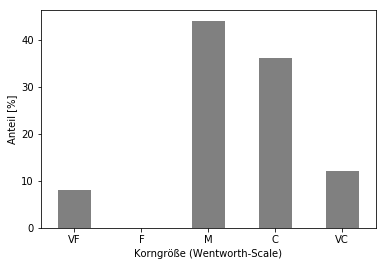

In [20]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [21]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,23,92.0
S/Gl/Laterit,1,4.0
S/Org,1,4.0


## Brennfarbe

In [22]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,6,22.222222
Sonstig,14,51.851852
Weiß,7,25.925926


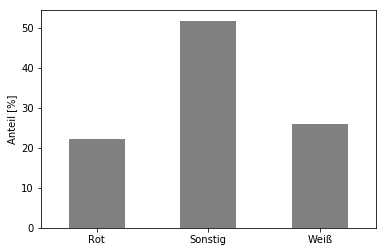

In [23]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [24]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

g        20
s        15
bg       12
bg s      4
          3
g g       2
br        2
s bg      2
 s        1
bg bg     1
dtype: int64

### Gefäßformen

In [25]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [26]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,8,88.888889
sicher,1,11.111111


In [27]:
a[0].sum()

9

In [28]:
# alles fragliche einfach abschneiden und nur 1. Variante behalten:
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Gef'] = df['Form_Gef'].apply(lambda x: x.split('/')[0])

In [29]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

In [30]:
# mit .isin nur noch solche Einträge auswählen, die sicher 'Pikunda-Munda' sind (ohne ? oder anderen Kram)
dfFilter = [style]
df = df[df['Typ'].isin(dfFilter)]
# display(df1.head())
# display(df1.head())

In [31]:
df_pivot

,objID
Form_Gef,
C1,1
C2,8


In [32]:
df_pivot['objID'].sum()

9

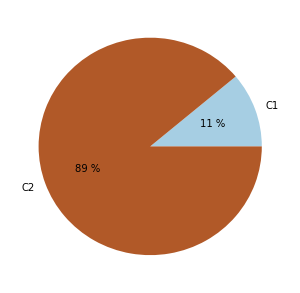

In [33]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
#plt.savefig('../output/figs/3-1-2-12_Epena_GefForm2.pdf', bbox_inches='tight')

### Proportionen

In [34]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# display(df.head())

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

a = df.loc[df['Form_Gef'].str.contains("C2")]
b = df.loc[~df['Form_Gef'].str.contains("C2")]

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

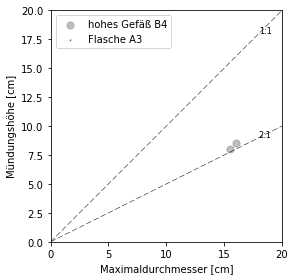

In [35]:
fig = plt.figure(1)
#fig.set_size_inches(10,10)

ax = plt.subplot(111)

plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'grey', s = 50, marker = "o", label = 'hohes Gefäß B4')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'black', s = 50, marker = "v", label = 'Flasche A3')#
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,50],[0, 10,20,50], color='black', linestyle = '--', linewidth=0.5)
ax.text(18, 18, '1:1', color='black', fontsize=8)

ax.plot([0, 10,20,50],[0, 5,10,25], color='black', linestyle = '--', linewidth=0.5)
ax.text(18, 9, '2:1', color='black', fontsize=8)

plt.xlim(0,20) 
plt.ylim(0,20) 

ax.set_aspect('equal')
plt.tight_layout()

#plt.savefig('../output/figs/3-1-2-2_Ngombe_Keramik-Proportionen.pdf', bbox_inches='tight')
plt.show()

In [36]:
df.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,maxD-muendH,muend-min,max-min
count,3.000000,2.000000,6.000000,2.0,8.000000,2.000000,2.000000,3.000000,5.000000
mean,12.333333,8.250000,12.000000,7.0,15.500000,4.500000,1.909926,1.075339,1.289554
std,2.516611,0.353553,2.428992,0.0,2.738613,0.707107,0.038995,0.033986,0.152026
min,10.000000,8.000000,9.000000,7.0,12.000000,4.000000,1.882353,1.043478,1.142857
25%,11.000000,8.125000,10.000000,7.0,13.875000,4.250000,1.896140,1.057453,1.200000
50%,12.000000,8.250000,12.250000,7.0,15.750000,4.500000,1.909926,1.071429,1.230769
75%,13.500000,8.375000,13.750000,7.0,16.500000,4.750000,1.923713,1.091270,1.347826
max,15.000000,8.500000,15.000000,7.0,20.000000,5.000000,1.937500,1.111111,1.526316


## Mündungs- und Randformen

In [37]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M5,4,66.666667
M1,2,33.333333


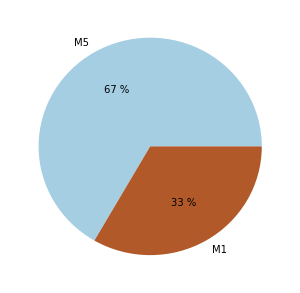

In [38]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [39]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,3,42.857143
B2,3,42.857143
B1.1,1,14.285714


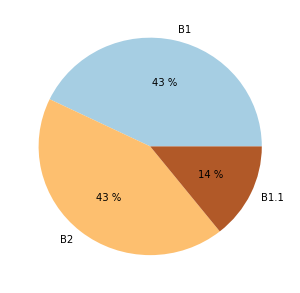

In [40]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


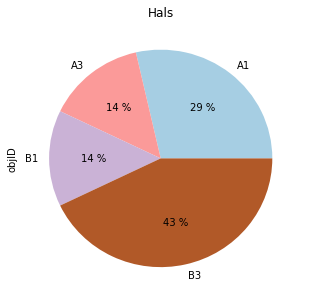

In [41]:
a = df.dropna(subset = ['Form_Hals'])
a['Form_Hals'] = a['Form_Hals'].map(lambda x: str(x)[:2])

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


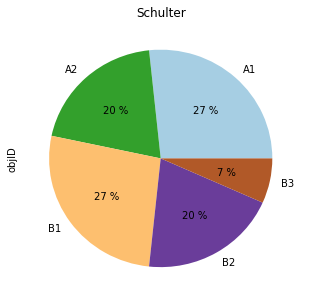

In [42]:
b = df.dropna(subset = ['Form_Schulter'])
b['Form_Schulter'] = b['Form_Schulter'].map(lambda x: str(x)[:2])

df_pivot = b.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Boden

In [43]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden,Anzahl


In [44]:
len(df['Form_Boden'])

0

## Verzierungen

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


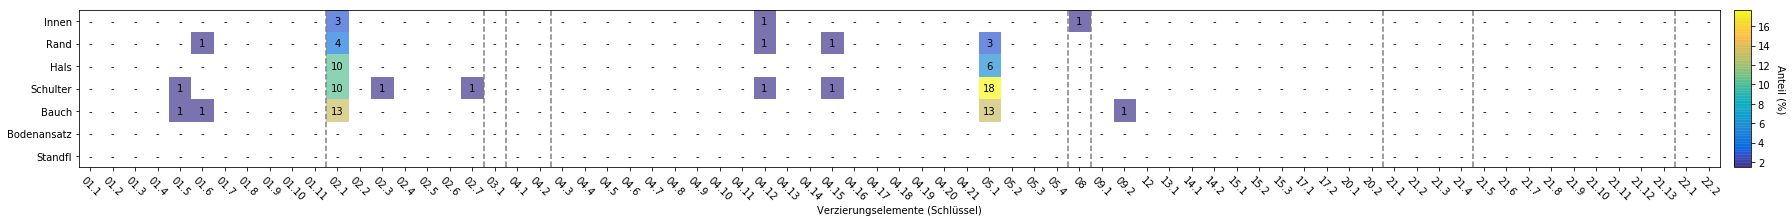

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-7_Ouesso_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [47]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


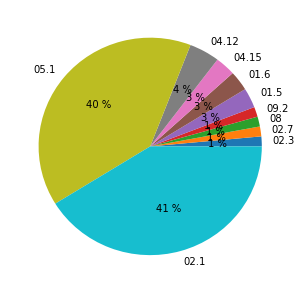

In [48]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%')
plt.ylabel('')

In [49]:
a = pd.Series({'Eindrücke (einzeln)':len(df.loc[df['verzName'].str.contains("04.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("04.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Eindrücke (einzeln),5,7.352941
Sonstiges,63,92.647059


In [50]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,4,5.882353
2 Rand,8,11.764706
3 Hals,11,16.176471
4 Schulter,24,35.294118
5 Bauch,21,30.882353


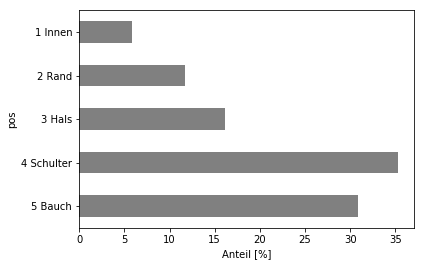

In [51]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

## Verbreitung

In [52]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
2,Pikunda (Fpl. 255),255,16.635736,0.549344,OUE
3,Matoto (Fpl. 264),264,16.431282,1.281643,OUE (?)
0,Ouesso (Fpl. 265),265,16.057202,1.617344,OUE
2,Gbagbale (Fpl. 270),270,16.082956,2.076599,OUE (?)
1,Bonda (Fpl. 272),272,16.084390,2.189246,OUE (?)
0,Bomasa (Fpl. 274),274,16.185432,2.203077,OUE (?)
1,Pandama (Fpl. 276),276,15.881677,1.783279,OUE


In [53]:
df.to_csv("../data/processed/3-1-2-7_OUE_Verbreitung.csv", index = False)

## Tafeln

In [54]:
# damit alle Zeilen angezeigt werden:
pd.set_option('display.max_rows', None)

In [55]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,54,12,PIK,87/101,NaN,91,OUE,None,B2/B1,None
1,60,9,MAT,87/101,NaN,44,OUE (?),None,None,None
2,63,6,PDM,87/101,NaN,125,OUE,C2 (?),B1.1 (?),None
3,63,7,PDM,87/101,NaN,123,OUE,C1 (?),B1,None
4,63,8,PDM,87/101,NaN,70,OUE,C2 (?),None,None
5,63,9,PDM,87/101,NaN,"51, 74",OUE (?),C2 (?),None,None
6,63,10,PDM,87/101,NaN,163,OUE,C2,None,None
7,63,11,PDM,87/101,NaN,33,OUE,C2 (?),None,None
8,65,8,PDM,87/101,NaN,103,OUE,None,None,None
9,65,12,PDM,87/102,NaN,"3, 12, 30",OUE,C2 (?),B1,None
